# PageRank

This notebook illustrates the ranking of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [4]:
pagerank = skn.ranking.PageRank()

In [5]:
pagerank.fit(adjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [6]:
score = pagerank.score_

**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, spring_layout, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
pos = spring_layout(graph)

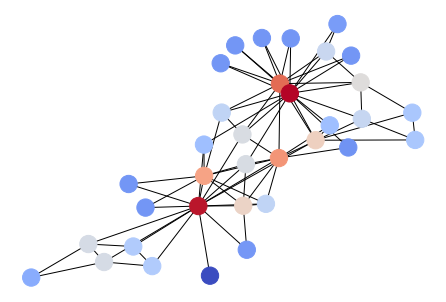

In [11]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color = np.log(score), cmap = 'coolwarm')

**Ranking with personalization**

In [12]:
target = [1,10]

In [13]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[target] = 1

In [14]:
pagerank.fit(adjacency, personalization)

PageRank(damping_factor=0.85, solver='lanczos')

In [15]:
score = pagerank.score_

**Visualization**

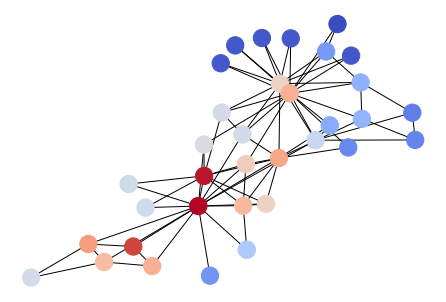

In [16]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color = np.log(score), cmap = 'coolwarm')

**Parameters**

In [17]:
# default engine = numba if available
pagerank = skn.ranking.PageRank()
pagerank.fit(adjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [18]:
pagerank = skn.ranking.PageRank(damping_factor=.99)
pagerank.fit(adjacency)
score = pagerank.score_

## Directed graphs

**Loading**

In [19]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [20]:
pagerank = skn.ranking.PageRank()

In [21]:
pagerank.fit(adjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [22]:
score = pagerank.score_

**Visualization**

In [23]:
from networkx import DiGraph

In [24]:
graph = from_scipy_sparse_matrix(adjacency, create_using=DiGraph())

In [25]:
pos = spring_layout(graph)

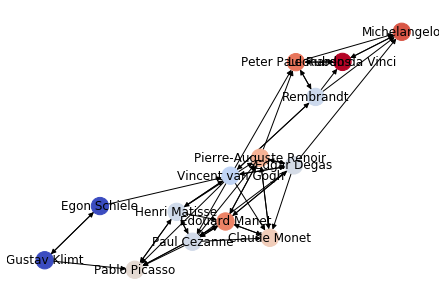

In [27]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=np.log(score), cmap='coolwarm', labels=names)

**Ranking with personalization**

In [28]:
cezanne = 11

In [29]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[cezanne] = 1

In [30]:
pagerank.fit(adjacency, personalization)

PageRank(damping_factor=0.85, solver='lanczos')

In [31]:
score = pagerank.score_

**Visualization**

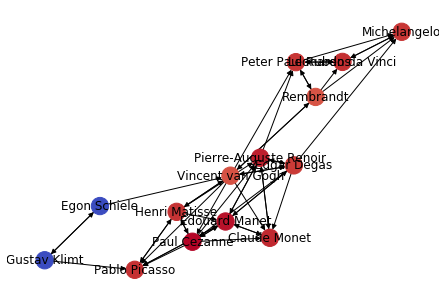

In [32]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=np.log(score + 1e-10), cmap='coolwarm', labels=names)

## Bipartite graphs

**Loading**

In [33]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Ranking**

In [34]:
pagerank.fit(biadjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [35]:
score = pagerank.score_

**Visualization**

In [36]:
from networkx import draw_networkx_labels

In [37]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [38]:
graph = from_scipy_sparse_matrix(adjacency)

In [39]:
n1, n2 = biadjacency.shape
pos = {i: (0, i) for i in range(n1)}
pos.update({n1 + i: (2, i) for i in range(n2)})

In [40]:
pos_labels = {i: (0.5, i) for i in range(n1)}
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [41]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

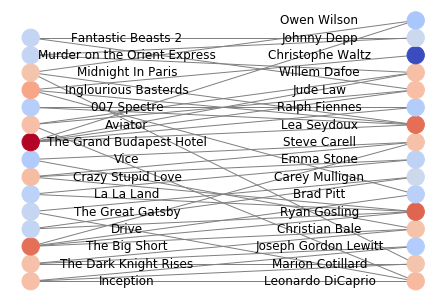

In [42]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos=pos, 
     edge_color='grey',
     node_color=np.log(score), 
     cmap='coolwarm')
show_labels = draw_networkx_labels(graph, pos_labels, labels=names)

**Ranking with personalization**

In [43]:
aviator = 9

In [44]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[aviator] = 1

In [45]:
pagerank.fit(biadjacency, personalization)

PageRank(damping_factor=0.85, solver='lanczos')

In [46]:
score = pagerank.score_

**Visualization**

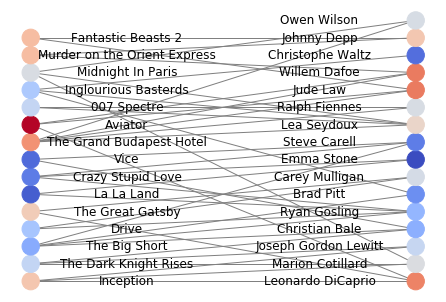

In [47]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos=pos, 
     edge_color='grey',
     node_color=np.log(score), 
     cmap='coolwarm')
show_labels = draw_networkx_labels(graph, pos_labels, labels=names)